In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
#import plotly.graph_objects as go
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

%matplotlib inline

In [137]:
covid_df=pd.read_csv('../data/COVID_CountByZipPerDate 03292021.csv')
covid_df.Zip = covid_df.Zip.astype('Int64')
covid_df.Zip = covid_df.Zip.astype('str')

In [138]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Specimen Collection Date  8832 non-null   object
 1   Zip                       8832 non-null   object
 2   Cases                     8832 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 207.1+ KB


In [139]:
covid_df.rename(columns = {'Specimen Collection Date': 'date', 'Zip': 'zip', 'Cases': 'cases'}, inplace = True)

In [140]:
covid_df.head(10)

,date,zip,cases
0,3/6/2020,37217,1
1,3/10/2020,37214,1
2,3/11/2020,37013,1
3,3/11/2020,37204,2
4,3/11/2020,37205,1
5,3/11/2020,37210,1
6,3/11/2020,37212,2
7,3/11/2020,37214,1
8,3/11/2020,37215,3
9,3/12/2020,<NA>,1


In [141]:
covid_df.tail()

,date,zip,cases
8827,3/27/2021,37210,1
8828,3/27/2021,37211,1
8829,3/27/2021,37212,1
8830,3/27/2021,37214,2
8831,3/27/2021,37221,2


In [142]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    8832 non-null   object
 1   zip     8832 non-null   object
 2   cases   8832 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 207.1+ KB


In [143]:
covid_df.zip = covid_df.zip.astype('str')

In [144]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    8832 non-null   object
 1   zip     8832 non-null   object
 2   cases   8832 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 207.1+ KB


In [145]:
#sorted by number of cases in zip code descending

In [146]:
case_by_zip = covid_df.groupby("zip", as_index = False).sum()


In [147]:
case_by_zip

,zip,cases
0,37013,13354
1,37027,231
2,37069,16
3,37072,2984
4,37076,4279
5,37080,574
6,37115,4574
7,37138,2359
8,37189,479
9,37201,299


In [148]:
case_by_zip = case_by_zip.sort_values('cases', ascending=False)

In [149]:
case_by_zip

,zip,cases
0,37013,13354
18,37211,10233
31,<NA>,8412
16,37209,5072
14,37207,4729
6,37115,4574
4,37076,4279
28,37221,3910
24,37217,3907
21,37214,3508


In [150]:
# cases grouped by number of cases per date
case_by_date = covid_df.groupby("date", as_index = False).sum()
case_by_date
case_by_date['date'] = pd.to_datetime(case_by_date['date'])
case_by_date

,date,cases
0,2021-01-01,178
1,2021-01-10,254
2,2021-01-11,530
3,2021-01-12,500
4,2021-01-13,647
...,...,...
379,2020-09-05,51
380,2020-09-06,41
381,2020-09-07,36
382,2020-09-08,122


In [151]:
case_by_date_sort = case_by_date.sort_values('date', ascending = True)
case_by_date_sort
case_by_date_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 196 to 188
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    384 non-null    datetime64[ns]
 1   cases   384 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.0 KB


In [152]:
case_by_date_sort

,date,cases
196,2020-03-06,1
152,2020-03-10,1
154,2020-03-11,11
156,2020-03-12,8
158,2020-03-13,18
...,...,...
180,2021-03-23,154
182,2021-03-24,177
184,2021-03-25,137
186,2021-03-26,96


In [153]:
case_by_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 383
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    384 non-null    datetime64[ns]
 1   cases   384 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.0 KB


In [154]:
import matplotlib.dates as mdates


we are working to put vertical lines in the graph below to represent major holidays to see if there is a correlation between holidays and covid cases

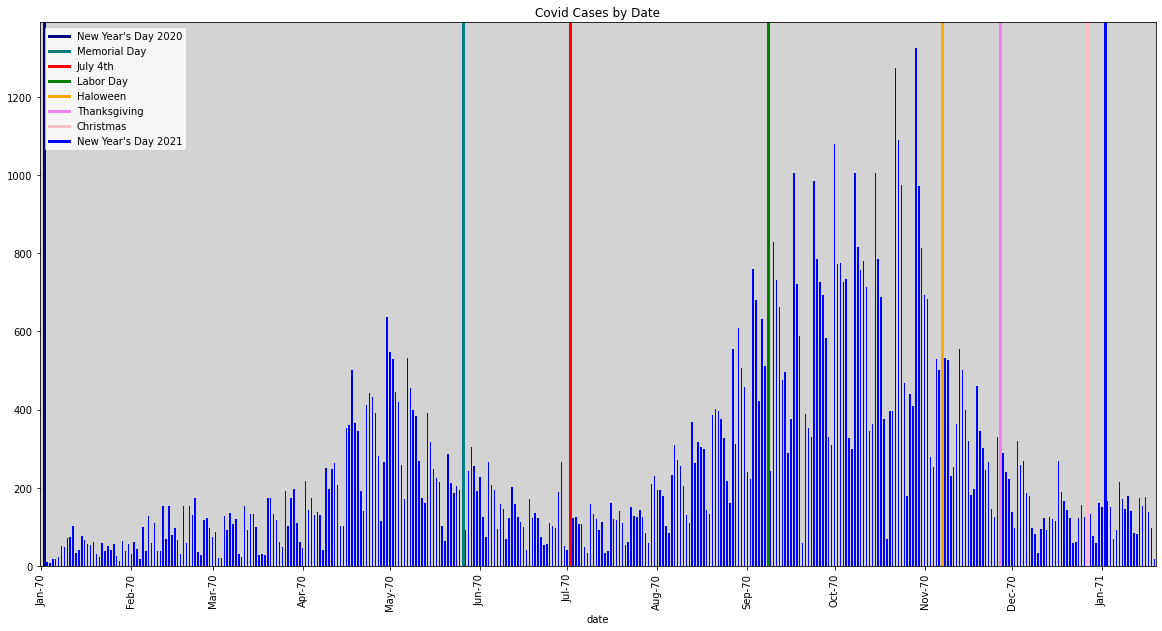

In [164]:

ax = case_by_date_sort.plot.bar(x = 'date', y = 'cases', label = '',  facecolor= 'blue',  title = 'Covid Cases by Date', figsize = (20,10))
#plt.axvline(dt.datetime(2012, 9, 21))
timeline = pd.date_range(start='2020, January', freq='M', periods=13)

plt.axvline(x = 1, color = 'navy', lw = 3, label = "New Year's Day 2020")
plt.axvline(x = 145, color = 'teal', lw = 3, label = 'Memorial Day')
plt.axvline(x = 182, color = 'red', lw = 3, label = 'July 4th')
plt.axvline(x = 250, color = 'green', lw = 3,label = 'Labor Day')
plt.axvline(x = 310, color = 'orange', lw = 3,label = 'Haloween')
plt.axvline(x = 330, color = 'violet', lw = 3,label = 'Thanksgiving')
plt.axvline(x = 360, color = 'pink', lw = 3, label = 'Christmas')
plt.axvline(x = 366, color = 'b', lw = 3, label = "New Year's Day 2021")


fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.set_facecolor('lightgrey')

plt.legend();


In [ ]:
#updated chart to match Teng's style:

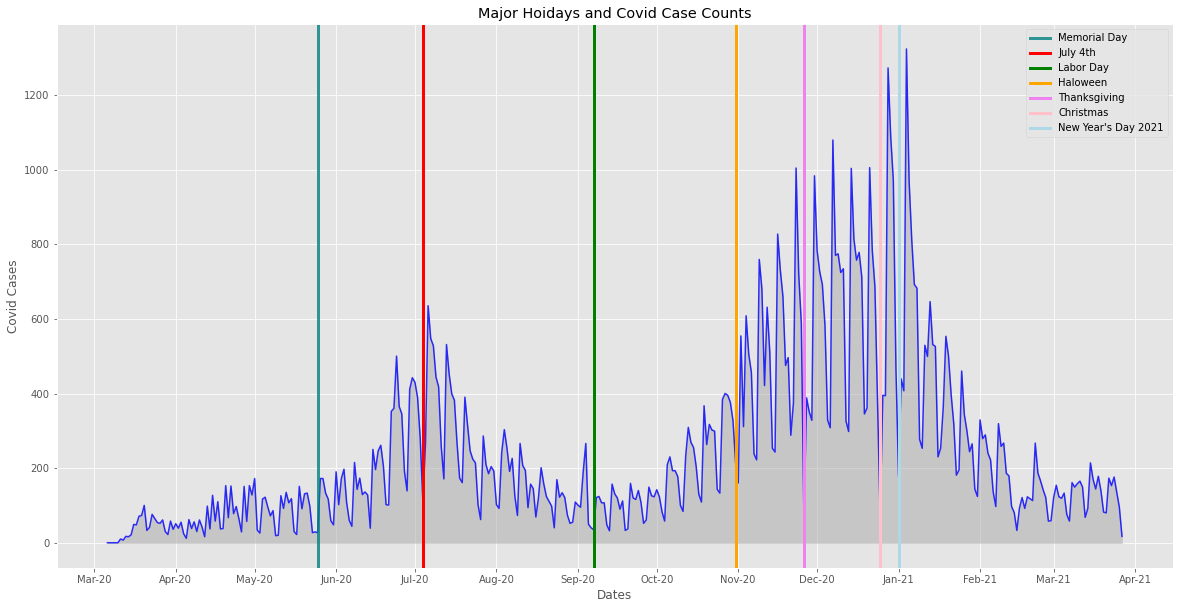

In [194]:
fig, ax1 = plt.subplots(figsize =(20,10)) #setting size of graph area
plt.style.use('ggplot')

ax1.fill_between(case_by_date_sort['date'], case_by_date_sort['cases'],color ='darkgray',alpha=0.5)

ax1.plot(case_by_date_sort['date'], case_by_date_sort['cases'], color="blue", alpha=0.8, label = '')

# ax = case_by_date_sort.plot.bar(x = 'date', y = 'cases', label = '',  facecolor= 'blue',  title = 'Covid Cases by Date', figsize = (20,10))
# #plt.axvline(dt.datetime(2012, 9, 21))
# timeline = pd.date_range(start='2020, January', freq='M', periods=13)

ax1.axvline(x = '2020-05-25', lw = 3, color = 'teal', alpha=0.8 ,label = 'Memorial Day')
ax1.axvline(x = '2020-07-04', color = 'red', lw = 3, label = 'July 4th')
ax1.axvline(x = '2020-09-07', color = 'green', lw = 3,label = 'Labor Day')
ax1.axvline(x = '2020-10-31', color = 'orange', lw = 3,label = 'Haloween')
ax1.axvline(x = '2020-11-26', color = 'violet', lw = 3,label = 'Thanksgiving')
ax1.axvline(x = '2020-12-25', color = 'pink', lw = 3, label = 'Christmas')
ax1.axvline(x = '2021-01-01', color = 'lightblue', lw = 3, label = "New Year's Day 2021")

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))

plt.title('Major Hoidays and Covid Case Counts')
ax1.set_xlabel('Dates')
ax1.set_ylabel('Covid Cases')
ax1.legend()
plt.savefig('../data/covid_holidays.png', transparent = True);

# fmt_month = mdates.MonthLocator()
# ax.xaxis.set_minor_locator(fmt_month)
# ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
# ax.set_facecolor('lightgrey')

# plt.legend();


In [156]:
#Trying to figure out this datetime business.....found this code on stack overflow and am going to pick through it to try to 
#fix above

In [ ]:
ethnicity_df = pd.read_excel('..\data\ethnicity_zip.xlsx', skiprows = 1, header=[0, 1], sheet_name = 0)
ethnicity_df = ethnicity_df[ethnicity_df.columns.drop(list(ethnicity_df.filter(regex='Error')))]
ethnicity_df.columns = ethnicity_df.columns.droplevel(1)


Reading in vaccine data:

In [ ]:
vaccine_df = pd.read_csv('../data/vaccine_with_protocol.csv')

In [ ]:
vaccine_df.info()

In [ ]:
vaccine_df.head()

reading in ethnicity data:


In [ ]:
ethnicity_df = pd.read_excel('..\data\ethnicity_zip.xlsx')

In [ ]:
ethnicity_df.head()

In [ ]:
ethnicity_df = pd.read_excel('..\data\ethnicity_zip.xlsx', skiprows = 1, header=[0, 1], sheet_name = 0)
ethnicity_df = ethnicity_df[ethnicity_df.columns.drop(list(ethnicity_df.filter(regex='Error')))]
ethnicity_df.columns = ethnicity_df.columns.droplevel(1)


In [ ]:
ethnicity_df.head()

In [ ]:
ethnicity_df.dtypes

In [ ]:
# code for making a line in a graph
#plt.annotate(s = 'overweight', xy = (1, 25.5))
#plt.annotate(s = 'obese', xy = (1, 30.5))
